<a href="https://colab.research.google.com/github/peetpan/Natural-Language-Processing/blob/main/Count_Vectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [ ]:
# One Time Run
# nltk.download("wordnet")
# nltk.download("punkt") #Punkt Sentence Tokenizer. This tokenizer divides a text into a list of sentences
# nltk.download("averaged_perceptron_tagger")
# !wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

In [ ]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [ ]:
inputs = df['text']
labels = df['labels']

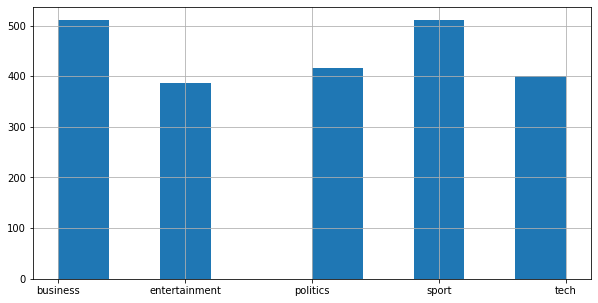

In [ ]:
labels.hist(figsize=(10,5))

In [ ]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels, random_state=123)

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
Xtrain

<1668x26287 sparse matrix of type '<class 'numpy.int64'>'
	with 337411 stored elements in Compressed Sparse Row format>

In [ ]:
(Xtrain != 0).sum()

337411

In [ ]:
# What percentage of values are non-zero?
(Xtrain != 0).sum() / np.prod(Xtrain.shape)

0.007695239935415004

In [ ]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score: ", model.score(Xtrain, Ytrain))
print("test score: ", model.score(Xtest, Ytest))

train score:  0.9922062350119905
test score:  0.9712746858168761


In [ ]:
# with stopwords
vectorizer = CountVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score: ", model.score(Xtrain, Ytrain))
print("test score: ", model.score(Xtest, Ytest))

train score:  0.9928057553956835
test score:  0.9766606822262118


In [ ]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADJ
  else:
    return wordnet.NOUN

In [ ]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags ]

In [ ]:
# with lemmetization 
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score: ", model.score(Xtrain, Ytrain))
print("test score: ", model.score(Xtest, Ytest))

train score:  0.9922062350119905
test score:  0.9676840215439856


In [ ]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [ ]:
# with stemming
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score: ", model.score(Xtrain, Ytrain))
print("test score: ", model.score(Xtest, Ytest))

train score:  0.9892086330935251
test score:  0.9694793536804309


In [ ]:
def simple_tokenizer(s):
  return s.split()

In [ ]:
# with string split tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score: ", model.score(Xtrain, Ytrain))
print("test score: ", model.score(Xtest, Ytest))

train score:  0.9952038369304557
test score:  0.9712746858168761
